In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta

In [2]:
def global_cases():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_daily_reports/{0}-{1}-{2}.csv'.format(str(t1.month).zfill(2), str(t1.day).zfill(2), t1.year))
    return df[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum(axis=0)
global_cases()

Confirmed    29764055.0
Deaths         939473.0
Recovered    20225219.0
Active        8599042.0
dtype: float64

In [3]:
def cases_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_daily_reports/{0}-{1}-{2}.csv'.format(str(t1.month).zfill(2), str(t1.day).zfill(2), t1.year))
    return df.groupby(['Country_Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().sort_values(['Deaths', 'Confirmed', 'Active', 'Recovered'], ascending=False)
cases_by_country()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,6630051,196763,2525573,3907719.0
Brazil,4419083,134106,3845464,439513.0
India,5020359,82066,3942360,995933.0
Mexico,680931,71978,574203,34750.0
United Kingdom,380677,41773,2190,336714.0
...,...,...,...,...
Dominica,24,0,18,6.0
Grenada,24,0,24,0.0
Laos,23,0,22,1.0


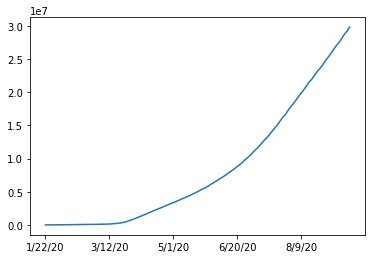

In [4]:
def global_confirmed_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0)
    return df
global_confirmed_timeseries().plot()

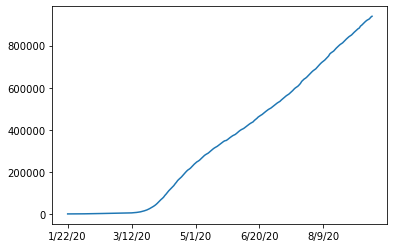

In [5]:
def global_deaths_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0)
    return df
global_deaths_timeseries().plot()

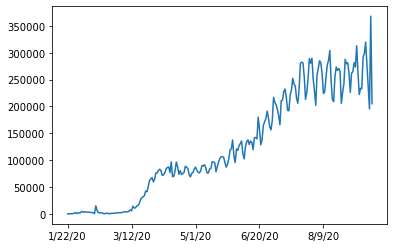

In [6]:
def global_new_confirmed_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0)
    return df
global_new_confirmed_timeseries().plot()

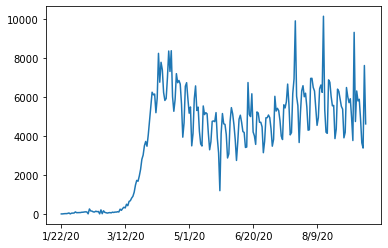

In [7]:
def global_new_deaths_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0)
    return df
global_new_deaths_timeseries().plot()

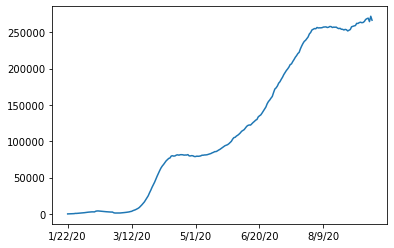

In [8]:
def global_new_confirmed_14day_moving_average():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return df
global_new_confirmed_14day_moving_average().plot()

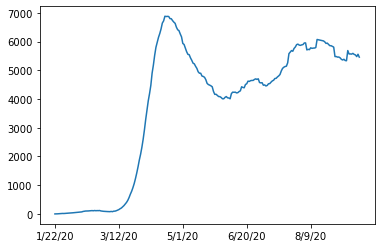

In [9]:
def global_new_deaths_14day_moving_average():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return df
global_new_deaths_14day_moving_average().plot()

In [10]:
def global_confirmed_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().sort_values([t_1], ascending=False)
    return df
global_confirmed_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,6300622,6327009,6360212,6396100,6443652,6485123,6520122,6553652,6593269,6630051
India,0,0,0,0,0,0,0,0,1,1,...,4280422,4370128,4465863,4562414,4659984,4754356,4846427,4846427,5020359,5020359
Brazil,0,0,0,0,0,0,0,0,0,0,...,4147794,4162073,4197889,4238446,4282164,4315687,4330455,4345610,4382263,4419083
Russia,0,0,0,0,0,0,0,0,0,2,...,1027334,1032354,1037526,1042836,1048257,1053663,1059024,1064438,1069873,1075485
Peru,0,0,0,0,0,0,0,0,0,0,...,689977,691575,696190,702776,710067,716670,722832,729619,733860,738020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Laos,0,0,0,0,0,0,0,0,0,0,...,22,22,22,22,23,23,23,23,23,23
Saint Kitts and Nevis,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
Holy See,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12


In [11]:
def global_deaths_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().sort_values([t_1], ascending=False)
    return df
global_deaths_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0,0,0,0,0,0,0,0,0,0,...,189208,189653,190859,191766,192979,193693,194071,194493,195786,196763
Brazil,0,0,0,0,0,0,0,0,0,0,...,126960,127464,128539,129522,130396,131210,131625,132006,133119,134106
India,0,0,0,0,0,0,0,0,0,0,...,72775,73890,75062,76271,77472,78586,79722,79722,82066,82066
Mexico,0,0,0,0,0,0,0,0,0,0,...,67781,68484,69049,69649,70183,70604,70821,71049,71678,71978
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,41643,41675,41683,41697,41703,41712,41717,41726,41753,41773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mongolia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Seychelles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bhutan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
def global_new_confirmed_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().diff(axis=1).fillna(value=0).sort_values([t_1], ascending=False)
    return df
global_new_confirmed_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10273.0,14279.0,35816.0,40557.0,43718.0,33523.0,14768.0,15155.0,36653.0,36820.0
US,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,...,24257.0,26387.0,33203.0,35888.0,47552.0,41471.0,34999.0,33530.0,39617.0,36782.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9215.0,12027.0,12259.0,11905.0,11507.0,10776.0,9056.0,9909.0,11892.0,11674.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26560.0,8964.0,8866.0,10764.0,12183.0,0.0,0.0,27404.0,9437.0,11193.0
France,0.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,19906.0,6544.0,9574.0,8951.0,9647.0,921.0,82.0,22977.0,8035.0,9964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Diamond Princess,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Denmark,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,230.0,244.0,252.0,317.0,293.0,343.0,338.0,347.0,339.0,0.0


In [13]:
def global_new_deaths_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().diff(axis=1).fillna(value=0).sort_values([t_1], ascending=False)
    return df
global_new_deaths_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,310.0,504.0,1075.0,983.0,874.0,814.0,415.0,381.0,1113.0,987.0
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,267.0,445.0,1206.0,907.0,1213.0,714.0,378.0,422.0,1293.0,977.0
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,223.0,703.0,565.0,600.0,534.0,421.0,217.0,228.0,629.0,300.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,270.0,276.0,253.0,249.0,241.0,115.0,89.0,315.0,185.0,264.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,98.0,78.0,34.0,71.0,48.0,0.0,0.0,101.0,156.0,239.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guinea-Bissau,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Guinea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grenada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


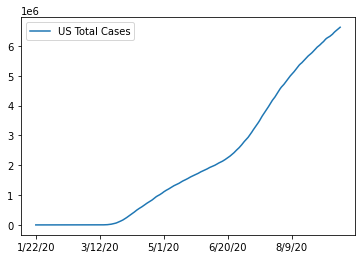

In [14]:
def us_total_confirmed_cases():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().fillna(value=0)
    return pd.DataFrame({'US Total Cases': df})
us_total_confirmed_cases().plot()

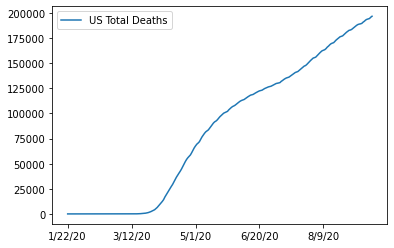

In [15]:
def us_total_deaths():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().fillna(value=0)
    return pd.DataFrame({'US Total Deaths': df})
us_total_deaths().plot()

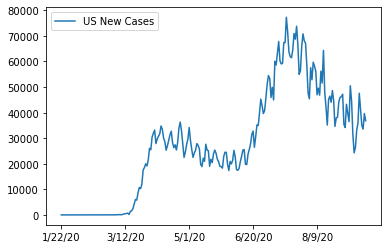

In [16]:
def us_new_confirmed_cases():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().diff().fillna(value=0)
    return pd.DataFrame({'US New Cases': df})
us_new_confirmed_cases().plot()

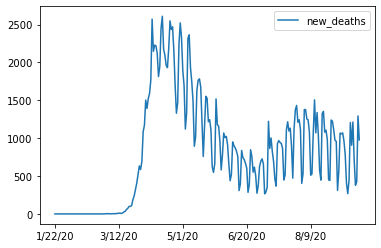

In [17]:
def us_new_deaths():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().diff().fillna(value=0)
    return pd.DataFrame({'new_deaths': df})
us_new_deaths().plot()

,new_confirmed
Province_State,
Texas,4054
California,3117
Florida,2355
Georgia,2062
Illinois,1943
Tennessee,1856
Missouri,1216
North Carolina,1137
Wisconsin,1097


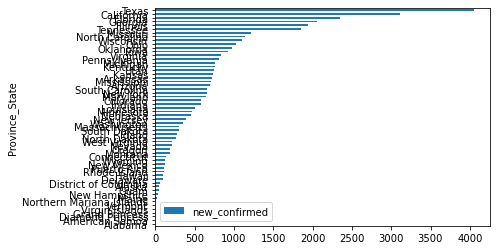

In [18]:
def new_confirmed_cases_by_state():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t2 = t0 - timedelta(days=2)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    t_2 = '{0}/{1}/{2}'.format(t2.month, t2.day, t2.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.groupby(['Province_State'])[['Province_State', t_1, t_2]].sum()
    df['new_confirmed'] = pd.Series(df[t_1] - df [t_2], index=df.index)
    df = df.drop([t_1, t_2], axis=1)
    return df.sort_values(['new_confirmed'], ascending=False)
new_confirmed_cases_by_state().sort_values(['new_confirmed'], ascending=True).plot.barh()
new_confirmed_cases_by_state()

,new_deaths
Province_State,
Florida,152
Texas,145
California,97
Ohio,49
Virginia,45
North Carolina,38
Illinois,35
South Carolina,34
Arizona,27


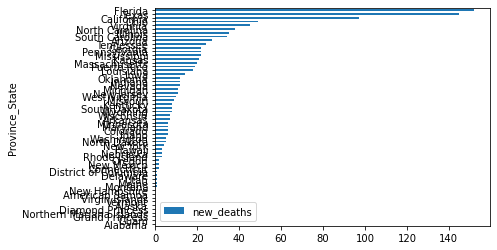

In [19]:
def new_deaths_by_state():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t2 = t0 - timedelta(days=2)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    t_2 = '{0}/{1}/{2}'.format(t2.month, t2.day, t2.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.groupby(['Province_State'])[['Province_State', t_1, t_2]].sum()
    df['new_deaths'] = pd.Series(df[t_1] - df [t_2], index=df.index)
    df = df.drop([t_1, t_2], axis=1)
    return df.sort_values(['new_deaths'], ascending=False)
new_deaths_by_state().sort_values(['new_deaths'], ascending=True).plot.barh()
new_deaths_by_state()

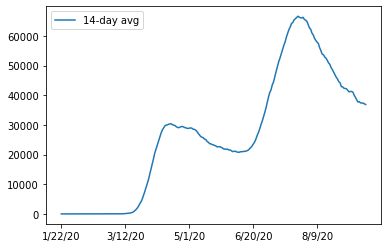

In [20]:
def us_new_cases_14day_moving_avg():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return pd.DataFrame({'14-day avg': df})
us_new_cases_14day_moving_avg().plot()

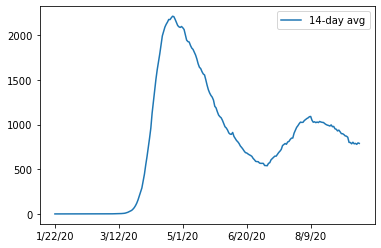

In [21]:
def us_new_deaths_14day_moving_avg():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return pd.DataFrame({'14-day avg': df})
us_new_deaths_14day_moving_avg().plot()

In [22]:
def confirmed_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().sort_values(['Province_State'], ascending=True)
    return df
confirmed_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,132973,133606,134417,135565,136703,137646,138755,139459,141087,141087
Alaska,0,0,0,0,0,0,0,0,0,0,...,5793,5828,5891,6012,6104,6207,6268,6343,6384,6432
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,...,205964,206045,206541,207002,207523,208128,208512,208725,209209,209907
Arkansas,0,0,0,0,0,0,0,0,0,0,...,65727,66021,66406,66804,67911,69710,70219,70627,71497,72219
California,0,0,0,0,2,2,2,2,2,3,...,740965,744344,747290,750961,754905,758933,761728,765134,768204,771321
Colorado,0,0,0,0,0,0,0,0,0,0,...,59464,59651,59891,60155,60462,60876,61293,61667,62079,62666
Connecticut,0,0,0,0,0,0,0,0,0,0,...,53365,53782,53871,54093,54326,54326,54326,54895,55031,55166
Delaware,0,0,0,0,0,0,0,0,0,0,...,18249,18308,18308,18466,18559,18726,18849,18937,19137,19234


In [23]:
def deaths_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['Population','UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().sort_values(['Province_State'], ascending=True)
    return df
deaths_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,2276,2277,2285,2301,2333,2350,2351,2355,2392,2392
Alaska,0,0,0,0,0,0,0,0,0,0,...,42,42,42,42,43,44,44,44,44,44
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,5219,5221,5251,5273,5288,5315,5322,5322,5344,5371
Arkansas,0,0,0,0,0,0,0,0,0,0,...,908,917,928,940,953,969,981,992,1150,1157
California,0,0,0,0,0,0,0,0,0,0,...,13758,13823,13983,14077,14230,14327,14378,14439,14594,14691
Colorado,0,0,0,0,0,0,0,0,0,0,...,1973,1973,1977,1979,1985,1988,1988,1990,1996,2002
Connecticut,0,0,0,0,0,0,0,0,0,0,...,4468,4474,4474,4478,4480,4480,4480,4485,4485,4487
Delaware,0,0,0,0,0,0,0,0,0,0,...,609,609,609,613,613,613,615,617,618,619


In [24]:
def new_confirmed_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().diff(axis=1).fillna(value=0).sort_values(['Province_State'], ascending=True)
    return df
new_confirmed_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,659.0,633.0,811.0,1148.0,1138.0,943.0,1109.0,704.0,1628.0,0.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.0,35.0,63.0,121.0,92.0,103.0,61.0,75.0,41.0,48.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,197.0,81.0,496.0,461.0,521.0,605.0,384.0,213.0,484.0,698.0
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,350.0,294.0,385.0,398.0,1107.0,1799.0,509.0,408.0,870.0,722.0
California,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,2109.0,3379.0,2946.0,3671.0,3944.0,4028.0,2795.0,3406.0,3070.0,3117.0
Colorado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,213.0,187.0,240.0,264.0,307.0,414.0,417.0,374.0,412.0,587.0
Connecticut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,417.0,89.0,222.0,233.0,0.0,0.0,569.0,136.0,135.0
Delaware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,206.0,59.0,0.0,158.0,93.0,167.0,123.0,88.0,200.0,97.0


In [25]:
def new_deaths_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['Population','UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().diff(axis=1).fillna(value=0).sort_values(['Province_State'], ascending=True)
    return df
new_deaths_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,8.0,16.0,32.0,17.0,1.0,4.0,37.0,0.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,2.0,30.0,22.0,15.0,27.0,7.0,0.0,22.0,27.0
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,9.0,11.0,12.0,13.0,16.0,12.0,11.0,158.0,7.0
California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,65.0,160.0,94.0,153.0,97.0,51.0,61.0,155.0,97.0
Colorado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,2.0,6.0,3.0,0.0,2.0,6.0,6.0
Connecticut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,4.0,2.0,0.0,0.0,5.0,0.0,2.0
Delaware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,2.0,2.0,1.0,1.0
